<a href="https://colab.research.google.com/github/dkd99/hotel-booking-analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

First we need to upload the hotel data to begin analysis.We will use reading command through which we can read comma seperated value files or excel file available in pandas library (This library can be acccesed through import pandas command).

Pandas converts csv file to a structured DataFrame.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
hotel_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hotel Bookings.csv')

**Let's have a breif look at our Data before diving deep into it.**

In [232]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,101.831122,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,101.831122,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.000000,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.000000,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.000000,0,1,Check-Out,2015-07-03


In [5]:
hotel_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


**Lets have a look at shape of the data.**

In [6]:
hotel_df.shape

(119390, 32)

We have exactly 119390 rows and 32 columns.Lets have a Look at what columns do we have in our Data.

In [7]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

**We have two types of Hotel -City hotel and resort hotel.**

In [8]:
hotel_df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

Agents who brought customers to hotel are

In [9]:
hotel_df['agent'].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

**Number of agents who were involved in bringing guests to hotel **

In [10]:
hotel_df['agent'].nunique()

333

We can see City hotel has had twice the number of customers compared to Resort Hotel.

In [11]:
hotel_df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [12]:
labels = hotel_df['hotel'].value_counts().index.tolist()
sizes = hotel_df['hotel'].value_counts().tolist()
explode = (0, 0.05)

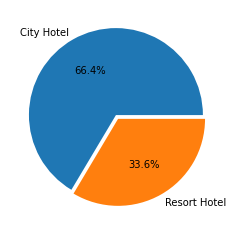

In [13]:
plt.pie(sizes,labels=labels,explode = explode,autopct='%1.1f%%')
plt.show()

We can have a look at some vital info regarding our Data.We can observe the following details-
**1)**We have 3 datatypes in our data which are int,float and object type.
**2)**Only **3** columns have  **null values**.They are agent and company.
**3)**Most of the customers visit through some agent.


In [14]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [15]:
hotel_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Lets have a look at lead time column.Looks like we have lead time in hours.

**customers having lead time >500 hours **

In [16]:
hotel_df[hotel_df['lead_time']>500].shape

(481, 32)

**customers having 0 lead time=6345**

In [17]:
hotel_df[hotel_df['lead_time']==0].shape

(6345, 32)

In [18]:
plt.rcParams["figure.figsize"] = (10,5)


Text(0.5, 1.0, 'lead time variation wih customers')

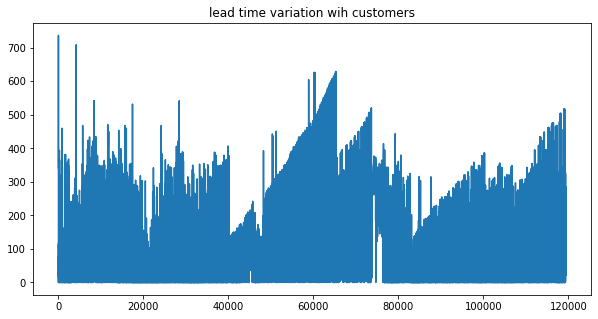

In [19]:
plt.plot(hotel_df['lead_time'])
plt.title('lead time variation wih customers')

**Lets have a look at distibution plot of Leadtime.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'distribution of lead times')]

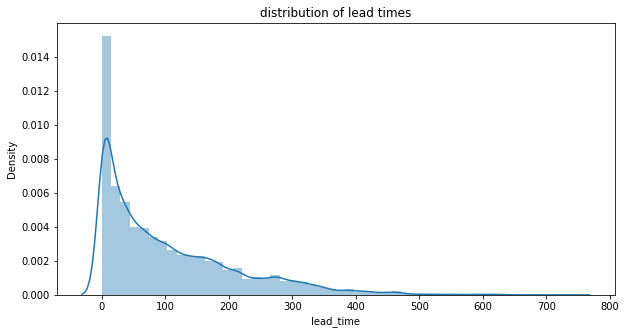

In [20]:
sns.distplot(hotel_df['lead_time'],hist=True ).set(title='distribution of lead times')


Lets have a look at number of hotel bookings that get cancelled.

In [21]:
hotel_df[hotel_df['is_canceled']!=0].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,2015-06-23
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,...,No Deposit,240.0,NaN,0,Transient,107.0,0,2,Canceled,2015-05-11
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,...,No Deposit,NaN,NaN,0,Transient,108.3,0,2,Canceled,2015-05-29


In [22]:
lead_time=hotel_df[['lead_time','arrival_date_month']].groupby('arrival_date_month').aggregate({'lead_time':'mean'}).rename(columns={'lead_time':'avg lead time'})
lead_time

,avg lead time
arrival_date_month,
April,94.822888
August,121.137710
December,73.561357
February,47.859569
January,45.310002
July,136.322565
June,128.247280
March,70.119257
May,117.646171


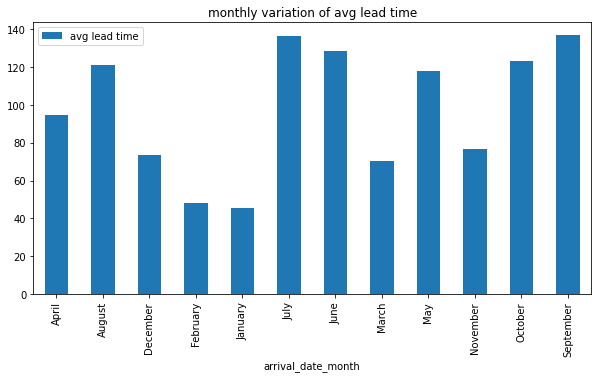

In [23]:
hotel_df[['lead_time','arrival_date_month']].groupby('arrival_date_month').aggregate({'lead_time':'mean'}).rename(columns={'lead_time':'avg lead time'}).plot(kind='bar',title='monthly variation of avg lead time')


In [217]:
hotel_df.shape

(119390, 32)

In [216]:
df1=hotel_df[['arrival_date_month','adr']].groupby('arrival_date_month').aggregate({'adr':'count'}).rename(columns={'adr':'number of customer bookings'}).sort_values('number of customer bookings')
df1

,number of customer bookings
arrival_date_month,
January,5929
December,6780
November,6794
February,8068
March,9794
September,10508
June,10939
April,11089
October,11160


In [38]:
leadtime_booking=pd.concat([lead_time.sort_values('avg lead time'),df1],axis=1)
leadtime_booking

,avg lead time,number of customer bookings
arrival_date_month,,
January,45.310002,5929
February,47.859569,8068
March,70.119257,9794
December,73.561357,6780
November,76.580807,6794
April,94.822888,11089
May,117.646171,11791
August,121.137710,13877
October,122.994624,11160


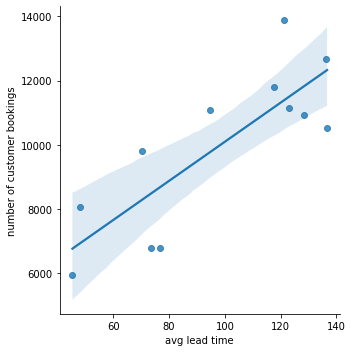

In [39]:
sns.lmplot(x="avg lead time",y='number of customer bookings',data=leadtime_booking)

In [40]:
leadtime_booking.corr()

,avg lead time,number of customer bookings
avg lead time,1.000000,0.815884
number of customer bookings,0.815884,1.000000


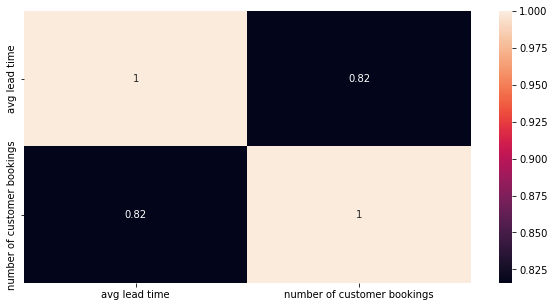

In [41]:
sns.heatmap(leadtime_booking.corr(),annot=True)

**Total number of bookings that get canceled.**

In [42]:
hotel_df[hotel_df['is_canceled']!=0]['is_canceled'].count()

44224

In [27]:
hotel_df[hotel_df['is_canceled']!=0]['is_canceled'].max()

1

**Lets campare which type of hotel gets canceled more.**

In [43]:
x=hotel_df[(hotel_df['is_canceled']!=0)&(hotel_df['hotel']=='Resort Hotel')]['is_canceled'].count()
x

11122

In [44]:
y=hotel_df[(hotel_df['is_canceled']!=0)&(hotel_df['hotel']=='City Hotel')]['is_canceled'].count()
y

33102

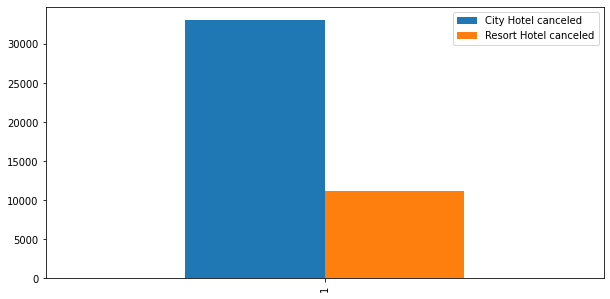

In [54]:
pd.DataFrame({'City Hotel canceled':y,'Resort Hotel canceled':x},index=['1']).plot(kind='bar')

**Clearly,City hotel gets canceled more frequently.**

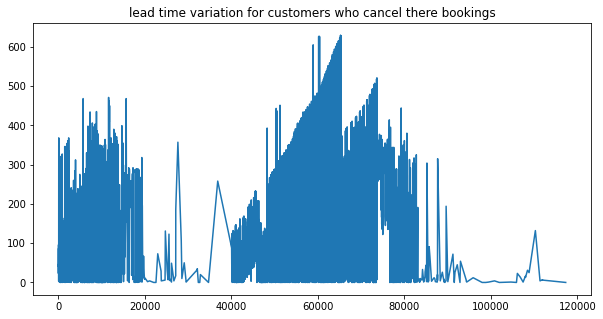

In [30]:
hotel_df[hotel_df['is_canceled']!=0]['lead_time'].plot(title='lead time variation for customers who cancel there bookings')

In [31]:
hotel_df['adr'].count()

119390

**Lets have look at monthly distribution of cancelations.**

In [32]:
df2=hotel_df[hotel_df['is_canceled']!=0].groupby('arrival_date_month').aggregate({'adr':'count'}).sort_values('adr').rename(columns={'adr':'monthly canceleations'})
df2

,monthly canceleations
arrival_date_month,
January,1807
November,2122
December,2371
February,2696
March,3149
September,4116
October,4246
April,4524
June,4535


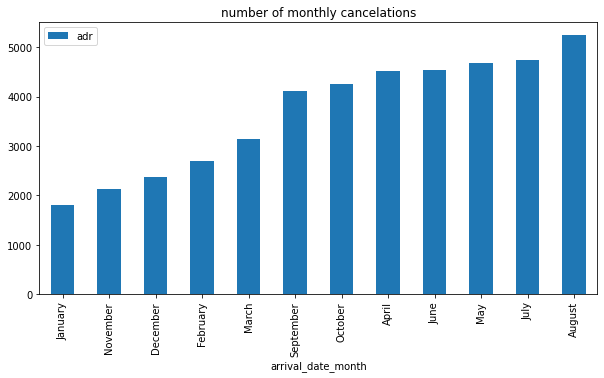

In [33]:
hotel_df[hotel_df['is_canceled']!=0].groupby('arrival_date_month').aggregate({'adr':'count'}).sort_values('adr').plot(kind='bar',title='number of monthly cancelations')

In [34]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [35]:
df1=hotel_df[['arrival_date_month','adr']].groupby('arrival_date_month').aggregate({'adr':'count'}).rename(columns={'adr':'number of customer bookings'}).sort_values('number of customer bookings')
df1

,number of customer bookings
arrival_date_month,
January,5929
December,6780
November,6794
February,8068
March,9794
September,10508
June,10939
April,11089
October,11160


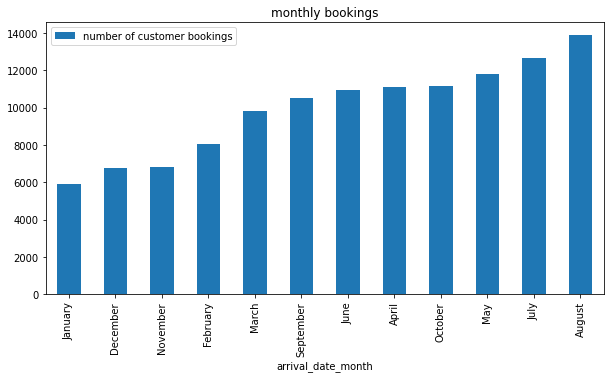

In [36]:
hotel_df[['arrival_date_month','adr']].groupby('arrival_date_month').aggregate({'adr':'count'}).rename(columns={'adr':'number of customer bookings'}).sort_values('number of customer bookings').plot(title='monthly bookings',kind='bar')

In [55]:
df3=pd.concat([df1,df2],axis=1)
df3

,number of customer bookings,monthly canceleations
arrival_date_month,,
January,5929,1807
December,6780,2371
November,6794,2122
February,8068,2696
March,9794,3149
September,10508,4116
June,10939,4535
April,11089,4524
October,11160,4246


In [56]:
df3['% cancelations']=(df3['monthly canceleations']/df3['number of customer bookings'])*100
df3

,number of customer bookings,monthly canceleations,% cancelations
arrival_date_month,,,
January,5929,1807,30.477315
December,6780,2371,34.970501
November,6794,2122,31.233441
February,8068,2696,33.415964
March,9794,3149,32.152338
September,10508,4116,39.170156
June,10939,4535,41.457172
April,11089,4524,40.797186
October,11160,4246,38.046595


In [57]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
number of customer bookings,12.0,9949.166667,2521.813303,5929.000000,7749.500000,10723.500000,11317.750000,13877.000000
monthly canceleations,12.0,3685.333333,1183.407894,1807.000000,2614.750000,4181.000000,4570.500000,5239.000000
% cancelations,12.0,36.382769,3.809803,30.477315,33.100058,37.603357,39.294079,41.457172


In [58]:
df3['% cancelations'].mean()

36.38276919283068

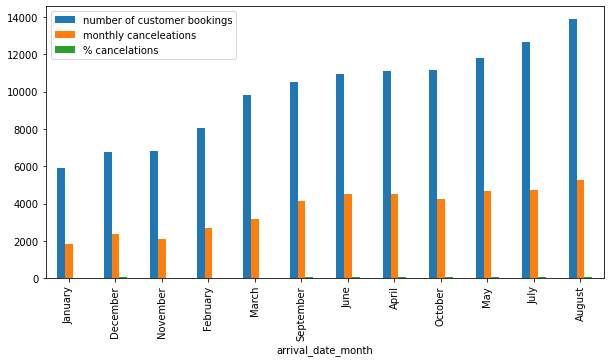

In [59]:
df3.plot(kind='bar')


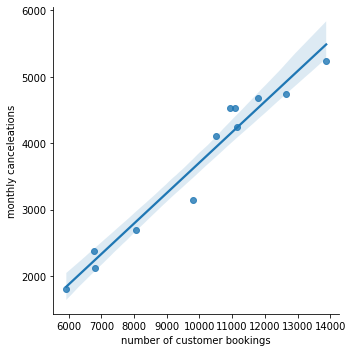

In [60]:
sns.lmplot(x='number of customer bookings',y='monthly canceleations',data=df3)

In [61]:
df3.corr()

,number of customer bookings,monthly canceleations,% cancelations
number of customer bookings,1.000000,0.977971,0.744308
monthly canceleations,0.977971,1.000000,0.864341
% cancelations,0.744308,0.864341,1.000000


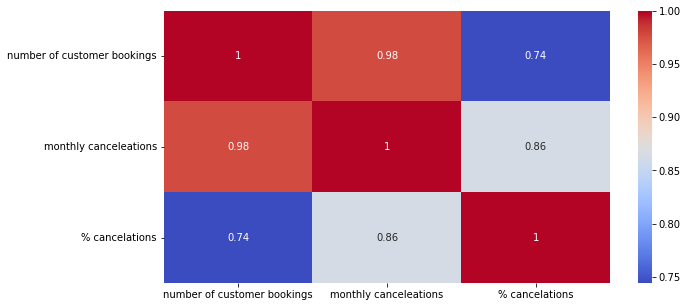

In [62]:
sns.heatmap(df3.corr(),annot=True,cmap='coolwarm')

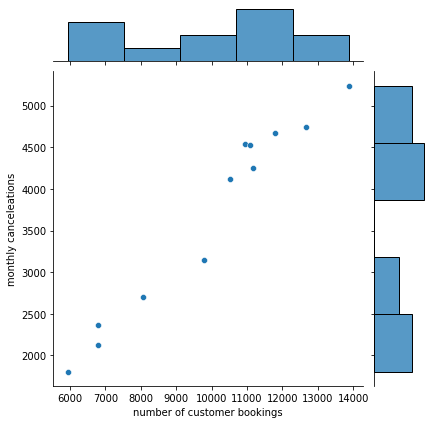

In [63]:
sns.jointplot(x='number of customer bookings',y='monthly canceleations',data=df3)

In [64]:
hotel_df['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [65]:
hotel_df[hotel_df['deposit_type']=='Refundable']['deposit_type'].count()

162

In [66]:
hotel_df[hotel_df['deposit_type']=='Non Refund']['deposit_type'].count()

14587

In [67]:
hotel_df[hotel_df['deposit_type']=='No Deposit']['deposit_type'].count()

104641

([<matplotlib.patches.Wedge at 0x7f9909076c90>,
 [Text(-1.064473906746513, 0.43519570523595025, 'No Deposit'),
  Text(1.1088095039352266, -0.45884799659900083, 'Non Refund'),
  Text(1.1999890976867778, -0.005115215818836994, 'Refundable')],
 [Text(-0.6016591646828116, 0.24598018122031967, '87.6%'),
  Text(0.6468055439622156, -0.2676613313494171, '12.2%'),
  Text(0.699993640317287, -0.00298387589432158, '0.1%')])

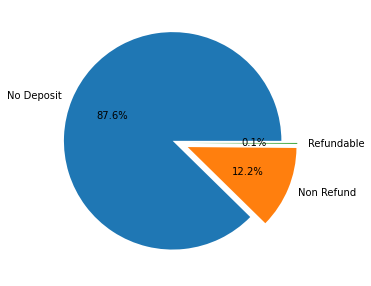

In [82]:
deposit_list=hotel_df['deposit_type'].value_counts().index.to_list()
depoit_count=hotel_df['deposit_type'].value_counts().to_list()
explode = (0.05, 0.1,0.1)
plt.pie(depoit_count,labels=deposit_list,explode=explode,autopct='%1.1f%%')

In [127]:
deposit_df=hotel_df[['deposit_type','adr']].groupby('deposit_type').aggregate({'adr':'count'}).rename(columns={'adr':'count'})

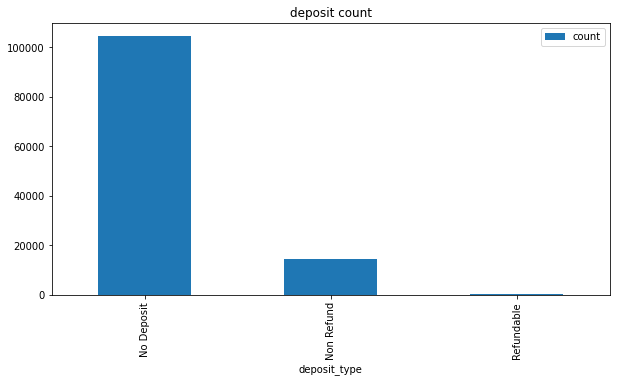

In [128]:
deposit_df.plot(kind='bar',title='deposit count')

[Text(0.5, 1.0, 'Types of Deposit type in diff hotel type')]

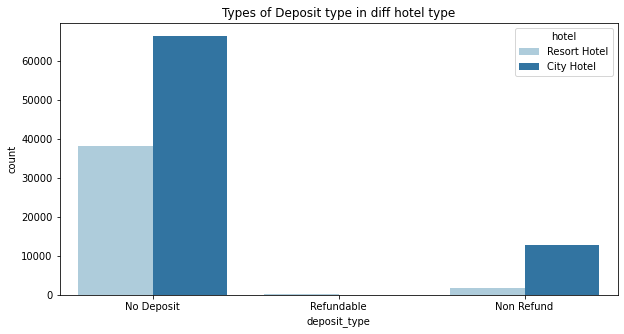

In [207]:
sns.countplot(data = hotel_df, x = 'deposit_type',hue='hotel', palette='Paired').set(title='Types of Deposit type in diff hotel type')


In [95]:
hotel_df[hotel_df['deposit_type']=='Non Refund']

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2133,Resort Hotel,1,87,2015,October,40,3,0,1,2,...,Non Refund,96.0,NaN,0,Transient,36.05,0,0,Canceled,2015-08-12
2134,Resort Hotel,1,87,2015,October,40,3,0,1,2,...,Non Refund,96.0,NaN,0,Transient,36.05,0,0,Canceled,2015-08-12
2135,Resort Hotel,1,87,2015,October,40,3,0,1,2,...,Non Refund,96.0,NaN,0,Transient,36.05,0,0,Canceled,2015-08-12
2136,Resort Hotel,1,87,2015,October,40,3,0,1,2,...,Non Refund,96.0,NaN,0,Transient,36.05,0,0,Canceled,2015-08-12
2141,Resort Hotel,1,87,2015,October,40,3,0,1,2,...,Non Refund,96.0,NaN,0,Transient,36.05,0,0,Canceled,2015-08-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95424,City Hotel,0,172,2016,August,34,16,0,3,1,...,Non Refund,NaN,51.0,0,Transient-Party,106.00,0,0,Check-Out,2016-08-19
95936,City Hotel,0,178,2016,August,35,22,1,3,1,...,Non Refund,NaN,51.0,0,Transient-Party,106.00,0,0,Check-Out,2016-08-26
96193,City Hotel,0,198,2016,August,35,25,2,3,2,...,Non Refund,22.0,NaN,0,Transient-Party,72.25,0,0,Check-Out,2016-08-30
96232,City Hotel,0,186,2016,August,35,26,2,2,2,...,Non Refund,9.0,NaN,0,Transient-Party,83.83,0,0,Check-Out,2016-08-30


In [98]:
hotel_df[(hotel_df['is_canceled']==1)&(hotel_df['deposit_type']=='Non Refund')].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2133,Resort Hotel,1,87,2015,October,40,3,0,1,2,...,Non Refund,96.0,NaN,0,Transient,36.05,0,0,Canceled,2015-08-12
2134,Resort Hotel,1,87,2015,October,40,3,0,1,2,...,Non Refund,96.0,NaN,0,Transient,36.05,0,0,Canceled,2015-08-12
2135,Resort Hotel,1,87,2015,October,40,3,0,1,2,...,Non Refund,96.0,NaN,0,Transient,36.05,0,0,Canceled,2015-08-12
2136,Resort Hotel,1,87,2015,October,40,3,0,1,2,...,Non Refund,96.0,NaN,0,Transient,36.05,0,0,Canceled,2015-08-12
2141,Resort Hotel,1,87,2015,October,40,3,0,1,2,...,Non Refund,96.0,NaN,0,Transient,36.05,0,0,Canceled,2015-08-12


In [99]:
len(hotel_df[(hotel_df['is_canceled']==1)&(hotel_df['deposit_type']=='Non Refund')])

14494

In [102]:
hotel_df[(hotel_df['is_canceled']==0)&(hotel_df['deposit_type']=='Non Refund')].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
4804,Resort Hotel,0,0,2016,April,14,1,0,2,1,...,Non Refund,NaN,223.0,0,Transient-Party,60.0,0,0,Check-Out,2016-04-03
4825,Resort Hotel,0,171,2016,April,15,4,1,1,1,...,Non Refund,298.0,NaN,0,Transient-Party,54.5,0,0,Check-Out,2016-04-06
4826,Resort Hotel,0,171,2016,April,15,4,1,1,2,...,Non Refund,298.0,NaN,0,Transient-Party,85.0,0,0,Check-Out,2016-04-06
4827,Resort Hotel,0,171,2016,April,15,4,1,1,2,...,Non Refund,298.0,NaN,0,Transient-Party,85.0,0,0,Check-Out,2016-04-06
4828,Resort Hotel,0,171,2016,April,15,4,1,1,2,...,Non Refund,298.0,NaN,0,Transient-Party,85.0,0,0,Check-Out,2016-04-06


In [103]:
len(hotel_df[(hotel_df['is_canceled']==0)&(hotel_df['deposit_type']=='Non Refund')])

93

In [84]:
hotel_df[(hotel_df['is_canceled']==1)&(hotel_df['deposit_type']=='Refundable')]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
4769,Resort Hotel,1,169,2016,March,14,31,1,3,2,...,Refundable,NaN,223.0,0,Transient-Party,46.00,0,0,Canceled,2016-03-24
4774,Resort Hotel,1,169,2016,March,14,31,1,3,2,...,Refundable,NaN,223.0,0,Transient-Party,46.00,0,0,Canceled,2016-03-24
4775,Resort Hotel,1,169,2016,March,14,31,1,3,2,...,Refundable,NaN,223.0,0,Transient-Party,46.00,0,0,Canceled,2016-03-24
4776,Resort Hotel,1,169,2016,March,14,31,1,3,2,...,Refundable,NaN,223.0,0,Transient-Party,46.00,0,0,Canceled,2016-03-24
4777,Resort Hotel,1,169,2016,March,14,31,1,3,2,...,Refundable,NaN,223.0,0,Transient-Party,46.00,0,0,Canceled,2016-03-24
4782,Resort Hotel,1,169,2016,March,14,31,1,3,2,...,Refundable,NaN,223.0,0,Transient-Party,66.00,0,0,Canceled,2016-03-24
4793,Resort Hotel,1,169,2016,March,14,31,1,3,2,...,Refundable,NaN,223.0,0,Transient-Party,46.00,0,0,Canceled,2016-03-24
4794,Resort Hotel,1,169,2016,March,14,31,1,3,2,...,Refundable,NaN,223.0,0,Transient-Party,46.00,0,0,Canceled,2016-03-24
8613,Resort Hotel,1,385,2016,October,41,8,0,1,2,...,Refundable,315.0,NaN,0,Transient-Party,48.00,0,0,No-Show,2016-10-08
10937,Resort Hotel,1,25,2017,April,15,11,2,7,2,...,Refundable,250.0,NaN,0,Transient,115.50,0,1,Canceled,2017-04-10


In [85]:
len(hotel_df[(hotel_df['is_canceled']==1)&(hotel_df['deposit_type']=='Refundable')].head())

5

In [107]:
hotel_df[(hotel_df['is_canceled']==0)&(hotel_df['deposit_type']=='Refundable')].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1559,Resort Hotel,0,14,2015,September,36,4,0,2,3,...,Refundable,96.0,NaN,0,Transient-Party,128.0,1,0,Check-Out,2015-09-06
4737,Resort Hotel,0,169,2016,March,14,31,0,3,2,...,Refundable,NaN,223.0,0,Transient-Party,66.0,0,0,Check-Out,2016-04-03
4738,Resort Hotel,0,169,2016,March,14,31,0,3,2,...,Refundable,NaN,223.0,0,Transient-Party,66.0,0,0,Check-Out,2016-04-03
4739,Resort Hotel,0,169,2016,March,14,31,0,3,2,...,Refundable,NaN,223.0,0,Transient-Party,66.0,0,0,Check-Out,2016-04-03
4740,Resort Hotel,0,169,2016,March,14,31,0,3,2,...,Refundable,NaN,223.0,0,Transient-Party,66.0,0,0,Check-Out,2016-04-03


In [86]:
len(hotel_df[(hotel_df['is_canceled']==0)&(hotel_df['deposit_type']=='Refundable')])

126

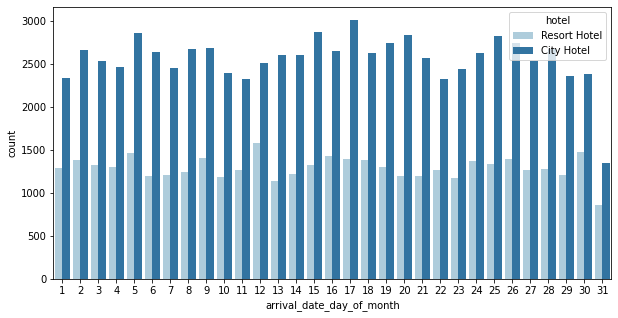

In [186]:
sns.countplot(data = hotel_df, x = 'arrival_date_day_of_month',hue='hotel',  palette='Paired')


In [93]:
df5=hotel_df[['arrival_date_year','arrival_date_month','adr']].groupby(['arrival_date_year','arrival_date_month']).aggregate({'adr':'count'}).rename(columns={'adr':'number of customer bookings'})
df5

number of customer bookings
arrival_date_year arrival_date_month                             
2015              August                                     3889
                  December                                   2920
                  July                                       2776
                  November                                   2340
                  October                                    4957
                  September                                  5114
2016              April                                      5428
                  August                                     5063
                  December                                   3860
                  February                                   3891
                  January                                    2248
                  July                                       4572
                  June                                       5292
                  March                                      4824
                  May                                        5478
                  November                                   4454
                  October                                    6203
                  September                                  5394
2017              April                                      5661
                  August                                     4925
                  February                                   4177
                  January                                    3681
                  July                                       5313
                  June                                       5647
                  March                                      4970
                  May                                        6313

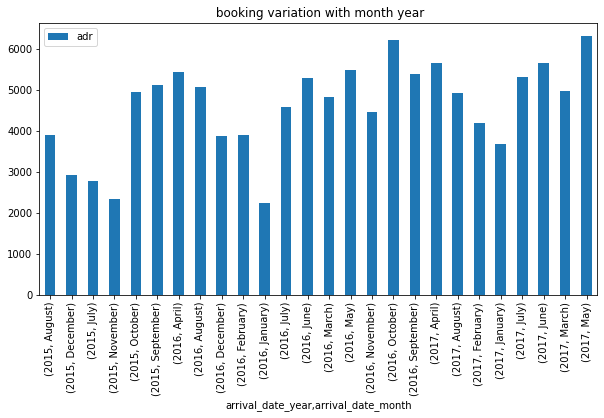

In [88]:
hotel_df[['arrival_date_year','arrival_date_month','adr']].groupby(['arrival_date_year','arrival_date_month']).aggregate({'adr':'count'}).plot(kind='bar',title=' booking variation with month year')

In [92]:
df6=hotel_df[hotel_df['is_canceled']!=0][['arrival_date_year','arrival_date_month','adr']].groupby(['arrival_date_year','arrival_date_month']).aggregate({'adr':'count'}).rename(columns={'adr':'number of customer cancelations'})
df6

number of customer cancelations
arrival_date_year arrival_date_month                                 
2015              August                                         1598
                  December                                        973
                  July                                           1259
                  November                                        486
                  October                                        1732
                  September                                      2094
2016              April                                          2061
                  August                                         1825
                  December                                       1398
                  February                                       1337
                  January                                         557
                  July                                           1499
                  June                                           2096
                  March                                          1477
                  May                                            1915
                  November                                       1636
                  October                                        2514
                  September                                      2022
2017              April                                          2463
                  August                                         1816
                  February                                       1359
                  January                                        1250
                  July                                           1984
                  June                                           2439
                  March                                          1672
                  May                                            2762

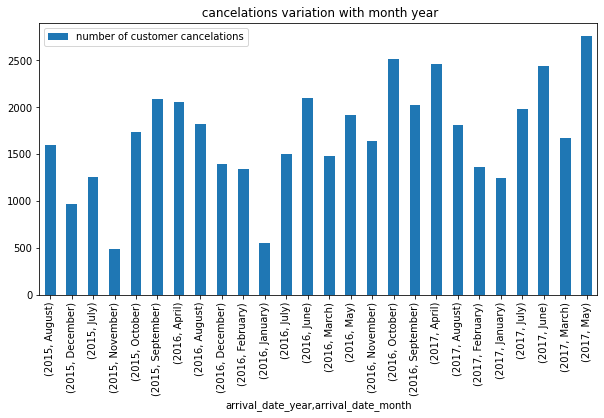

In [90]:
hotel_df[hotel_df['is_canceled']!=0][['arrival_date_year','arrival_date_month','adr']].groupby(['arrival_date_year','arrival_date_month']).aggregate({'adr':'count'}).rename(columns={'adr':'number of customer cancelations'}).plot(kind='bar',title=' cancelations variation with month year')

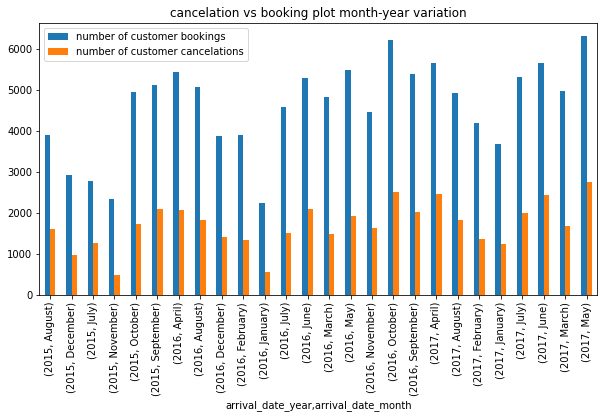

In [96]:
pd.concat([df5,df6],axis=1).plot(kind='bar',title='cancelation vs booking plot month-year variation')

In [151]:
hotel_df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [147]:
hotel_df[['days_in_waiting_list','hotel']].groupby('hotel').mean('days_in_waiting_list')

,days_in_waiting_list
hotel,
City Hotel,3.226774
Resort Hotel,0.527758


In [152]:
waitingtime_df=hotel_df[['days_in_waiting_list','arrival_date_month']].groupby('arrival_date_month').aggregate({'days_in_waiting_list':['min','max','mean']})
waitingtime_df

days_in_waiting_list               
                                    min  max      mean
arrival_date_month                                    
April                                 0  224  3.012445
August                                0  147  0.398717
December                              0  167  3.007522
February                              0  165  0.764874
January                               0   91  2.526396
July                                  0   96  0.229919
June                                  0  117  1.955115
March                                 0  223  1.376965
May                                   0  259  4.339072
November                              0  116  1.767736
October                               0  391  4.598835
September                             0  379  4.221926

In [153]:
pd.concat([waitingtime_df,df1],axis=1)

,"(days_in_waiting_list, min)","(days_in_waiting_list, max)","(days_in_waiting_list, mean)",number of customer bookings
arrival_date_month,,,,
April,0,224,3.012445,11089
August,0,147,0.398717,13877
December,0,167,3.007522,6780
February,0,165,0.764874,8068
January,0,91,2.526396,5929
July,0,96,0.229919,12661
June,0,117,1.955115,10939
March,0,223,1.376965,9794
May,0,259,4.339072,11791


In [156]:
mean_waiting_days=hotel_df[['days_in_waiting_list','arrival_date_month']].groupby('arrival_date_month').aggregate({'days_in_waiting_list':'mean'})

In [157]:
pd.concat([mean_waiting_days,df1],axis=1).corr()

,days_in_waiting_list,number of customer bookings
days_in_waiting_list,1.000000,-0.081161
number of customer bookings,-0.081161,1.000000


([<matplotlib.patches.Wedge at 0x7f990863a250>,
 [Text(-0.8146799318246912, 0.8116628663935026, 'Transient'),
  Text(0.7402968691062715, -0.9444366286794748, 'Transient-Party'),
  Text(1.18865426397428, -0.16462393731096034, 'Contract'),
  Text(1.1998616892720384, -0.018218853346205544, 'Group')],
 [Text(-0.4604712658139558, 0.45876596796154484, '75.1%'),
  Text(0.4318398403119917, -0.5509213667296935, '21.0%'),
  Text(0.6933816539849966, -0.09603063009806018, '3.4%'),
  Text(0.6999193187420223, -0.010627664451953234, '0.5%')])

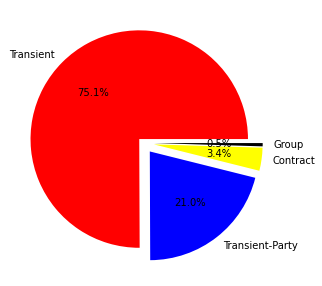

In [119]:
size=hotel_df['customer_type'].value_counts().tolist()
labels=hotel_df['customer_type'].value_counts().index.tolist()
explode = (0.05, 0.1,0.1,0.1)
color=['red','blue','yellow','black']
plt.pie(size,labels=labels,explode=explode,autopct='%1.1f%%',colors=color)

In [102]:
hotel_df[['customer_type','hotel','adr']].groupby(['customer_type','hotel']).aggregate({'adr':'count'}).rename(columns={'adr':'count'})

count
customer_type   hotel              
Contract        City Hotel     2300
                Resort Hotel   1776
Group           City Hotel      293
                Resort Hotel    284
Transient       City Hotel    59404
                Resort Hotel  30209
Transient-Party City Hotel    17333
                Resort Hotel   7791

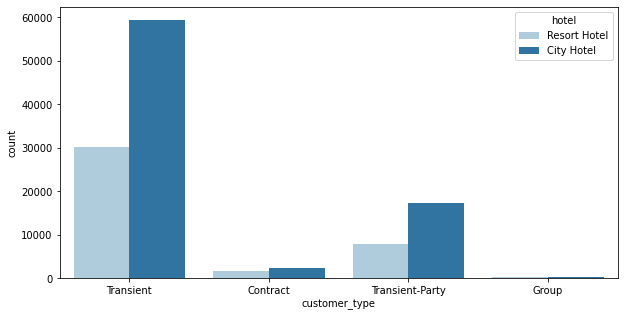

In [289]:
sns.countplot(x='customer_type',data=hotel_df,hue='hotel',palette='Paired')

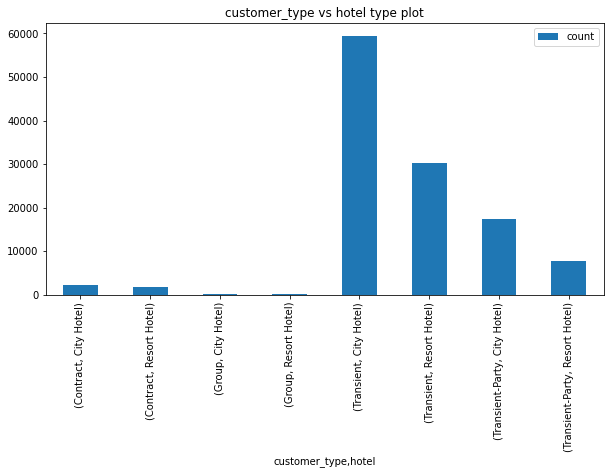

In [105]:
hotel_df[['customer_type','hotel','adr']].groupby(['customer_type','hotel']).aggregate({'adr':'count'}).rename(columns={'adr':'count'}).plot(kind='bar',title='customer_type vs hotel type plot')

[Text(0.5, 1.0, 'customer_type vs hotel type plot')]

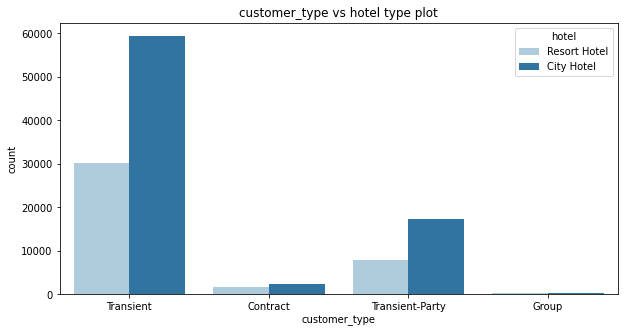

In [204]:
sns.countplot(data=hotel_df,x='customer_type',hue='hotel',palette='Paired').set(title='customer_type vs hotel type plot')

In [106]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [115]:
hotel_df[hotel_df['required_car_parking_spaces']!=0].groupby('customer_type').aggregate({'adr':'count'}).rename(columns={'adr':'count'})

,count
customer_type,
Contract,134
Group,51
Transient,6420
Transient-Party,811


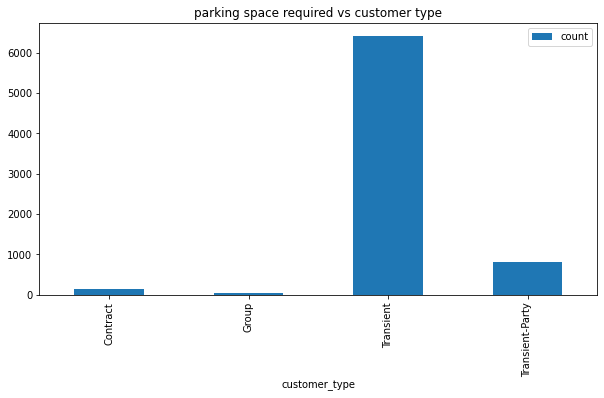

In [117]:
hotel_df[hotel_df['required_car_parking_spaces']!=0].groupby('customer_type').aggregate({'adr':'count'}).rename(columns={'adr':'count'}).plot(kind='bar',title='parking space required vs customer type')

In [114]:
hotel_df[hotel_df['required_car_parking_spaces']!=0].groupby('hotel').aggregate({'adr':'count'}).rename(columns={'adr':'count'})

,count
hotel,
City Hotel,1926
Resort Hotel,5490


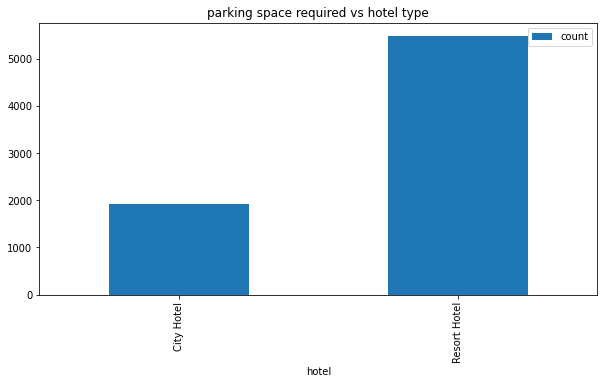

In [116]:
hotel_df[hotel_df['required_car_parking_spaces']!=0].groupby('hotel').aggregate({'adr':'count'}).rename(columns={'adr':'count'}).plot(kind='bar',title='parking space required vs hotel type')

In [123]:
hotel_df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [133]:
hotel_df.iloc[14038]

hotel                             Resort Hotel
is_canceled                                  0
lead_time                                  126
arrival_date_year                         2016
arrival_date_month                        July
arrival_date_week_number                    28
arrival_date_day_of_month                    5
stays_in_weekend_nights                     19
stays_in_week_nights                        50
adults                                       1
children                                   0.0
babies                                       0
meal                                        HB
country                                    NaN
market_segment                          Direct
distribution_channel                    Direct
is_repeated_guest                            0
previous_cancellations                       0
previous_bookings_not_canceled               1
reserved_room_type                           E
assigned_room_type                           E
booking_chang

In [132]:
z=hotel_df[hotel_df['is_canceled']!=1]['stays_in_week_nights']+hotel_df[hotel_df['is_canceled']!=1]['stays_in_weekend_nights']
z.idxmax()

14038

In [142]:
z.mean()

3.3930234414495914

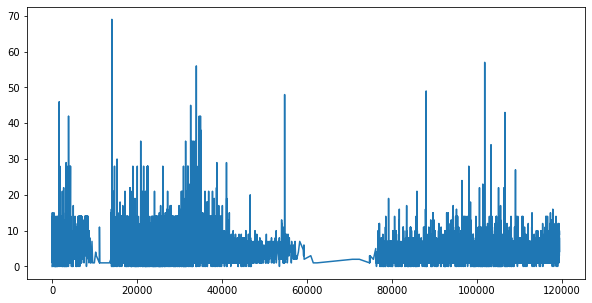

In [137]:
z.plot()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'distribution of stays')]

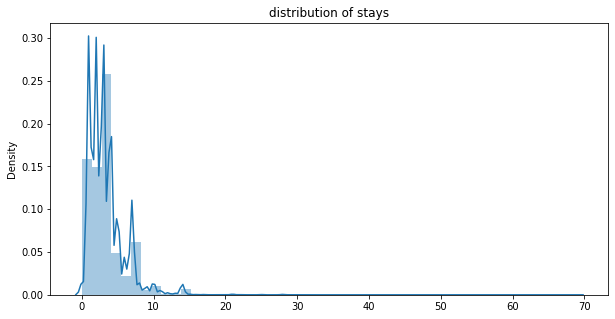

In [136]:
sns.distplot(z,hist=True ).set(title='distribution of stays')


In [155]:
hotel_df[hotel_df['is_repeated_guest']!=0].count()

hotel                             3810
is_canceled                       3810
lead_time                         3810
arrival_date_year                 3810
arrival_date_month                3810
arrival_date_week_number          3810
arrival_date_day_of_month         3810
stays_in_weekend_nights           3810
stays_in_week_nights              3810
adults                            3810
children                          3810
babies                            3810
meal                              3810
country                           3806
market_segment                    3810
distribution_channel              3810
is_repeated_guest                 3810
previous_cancellations            3810
previous_bookings_not_canceled    3810
reserved_room_type                3810
assigned_room_type                3810
booking_changes                   3810
deposit_type                      3810
agent                             1445
company                           1670
days_in_waiting_list     

In [156]:
w=hotel_df[(hotel_df['is_canceled']!=1)&(hotel_df['is_repeated_guest']!=0)]['stays_in_week_nights']+hotel_df[(hotel_df['is_canceled']!=1)&(hotel_df['is_repeated_guest']!=0)]['stays_in_weekend_nights']
len(w)

3258

([<matplotlib.patches.Wedge at 0x7f990810ccd0>,
 [Text(-1.1445768110507222, 0.11155233572166706, 'total customers'),
  Text(1.1943410168210953, -0.11640247221924499, 'repeated cusstomers')],
 [Text(-0.6469347192895385, 0.06305132019050746, '96.9%'),
  Text(0.6966989264789722, -0.0679014421278929, '3.1%')])

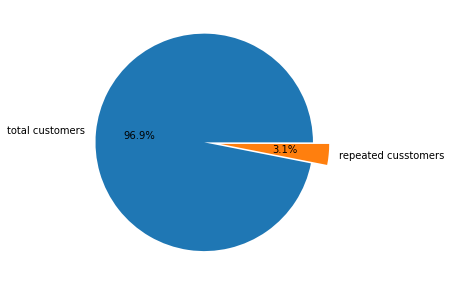

In [158]:
size=[len(hotel_df),3810]
labels=['total customers','repeated cusstomers']
explode=(0.05,0.1)
plt.pie(size,labels=labels,explode=explode,autopct='%1.1f%%')

Text(0.5, 1.0, 'Graph showing whether guest is repeated guest')

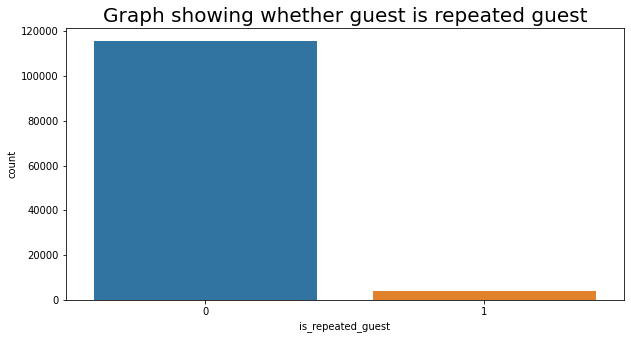

In [209]:
sns.countplot(data = hotel_df, x = 'is_repeated_guest').set_title('Graph showing whether guest is repeated guest', fontsize = 20)


In [176]:
hotel_df[(hotel_df['children']!=0)&(hotel_df['adults']!=0)]['children'].groupby(hotel_df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,4883.0,1.391563,0.507892,1.0,1.0,1.0,2.0,3.0
Resort Hotel,3484.0,1.479621,0.529235,1.0,1.0,1.0,2.0,10.0


In [177]:
hotel_df[(hotel_df['children']!=0)&(hotel_df['adults']!=0)]['adults'].groupby(hotel_df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,4887.0,1.963986,0.298606,1.0,2.0,2.0,2.0,3.0
Resort Hotel,3484.0,2.076636,0.383607,1.0,2.0,2.0,2.0,4.0


In [179]:
hotel_df['adults'].groupby(hotel_df['hotel']).describe()


,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79330.0,1.850977,0.509292,0.0,2.0,2.0,2.0,4.0
Resort Hotel,40060.0,1.867149,0.697285,0.0,2.0,2.0,2.0,55.0


In [180]:
hotel_df['children'].groupby(hotel_df['hotel']).describe()


,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79326.0,0.091370,0.372177,0.0,0.0,0.0,0.0,3.0
Resort Hotel,40060.0,0.128682,0.445195,0.0,0.0,0.0,0.0,10.0


In [192]:
hotel_df[['adr','country']].groupby('country').aggregate({'adr':'count'}).rename(columns={'adr':'count'}).sort_values('count',ascending=False).head(10)

,count
country,
PRT,48590
GBR,12129
FRA,10415
ESP,8568
DEU,7287
ITA,3766
IRL,3375
BEL,2342
BRA,2224


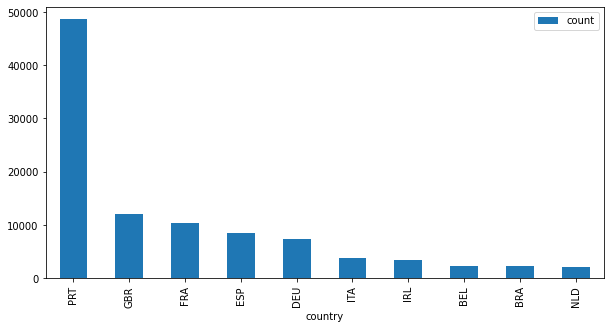

In [193]:
hotel_df[['adr','country']].groupby('country').aggregate({'adr':'count'}).rename(columns={'adr':'count'}).sort_values('count',ascending=False).head(10).plot(kind='bar')

In [196]:
hotel_df[['adr','country','hotel']].groupby(['country','hotel']).aggregate({'adr':'count'}).rename(columns={'adr':'count'}).sort_values('count',ascending=False).head(10)

count
country hotel              
PRT     City Hotel    30960
        Resort Hotel  17630
FRA     City Hotel     8804
GBR     Resort Hotel   6814
DEU     City Hotel     6084
GBR     City Hotel     5315
ESP     City Hotel     4611
        Resort Hotel   3957
ITA     City Hotel     3307
IRL     Resort Hotel   2166

In [212]:
hotel_df['adr'].index

RangeIndex(start=0, stop=119390, step=1)

In [183]:
hotel_df['country'].nunique()

177

In [237]:
hotel_df.loc[hotel_df['adr']==0,'adr']=hotel_df['adr'].mean()

[2, 2, 2, 2]

In [242]:
rate_df=hotel_df['adr']
adr_mean_list=[hotel_df['adr'].mean()]*len(hotel_df)
adr_df=pd.DataFrame({'adr':rate_df,'mean_adr':adr_mean_list})

In [243]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [246]:
year_month_df=hotel_df[['arrival_date_year','arrival_date_month']]

In [248]:
adr_df=pd.concat([adr_df,hotel_df[['arrival_date_year','arrival_date_month']]],axis=1)

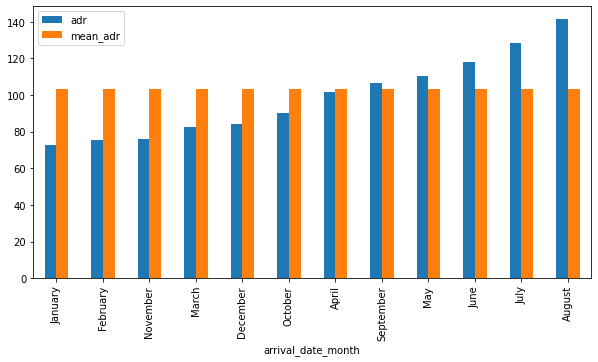

In [253]:
adr_df.groupby('arrival_date_month').aggregate({'adr':'mean','mean_adr':'mean'}).sort_values('adr').plot(kind='bar')

In [258]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [264]:
hotel_df['distribution_channel'].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [266]:
import matplotlib.pyplot as plt


([<matplotlib.patches.Wedge at 0x7f9905c69610>,
 [Text(-0.9704935663433553, 0.616962103930343, 'TA/TO'),
  Text(0.8803316828916316, -0.8154852102259047, 'Direct'),
  Text(1.1792762025132837, -0.2220532327750468, 'Corporate'),
  Text(1.1999828786331883, -0.006410225207232818, 'GDS'),
  Text(2.099999981769331, -0.0002767106933115512, 'Undefined')],
 [Text(-0.5485398418462443, 0.34871771091715037, '82.0%'),
  Text(0.5135268150201183, -0.4756997059651111, '12.3%'),
  Text(0.6879111181327486, -0.1295310524521106, '5.6%'),
  Text(0.6999900125360263, -0.0037392980375524766, '0.2%'),
  Text(1.5999999861099665, -0.00021082719490403897, '0.0%')])

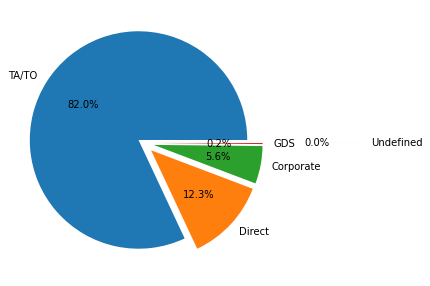

In [272]:
dist_ch=hotel_df['distribution_channel'].value_counts().tolist()
labels=hotel_df['distribution_channel'].value_counts().index.tolist()
explode=(0.05,0.1,0.1,0.1,1)
plt.pie(dist_ch,labels=labels,explode=explode,autopct='%1.1f%%')

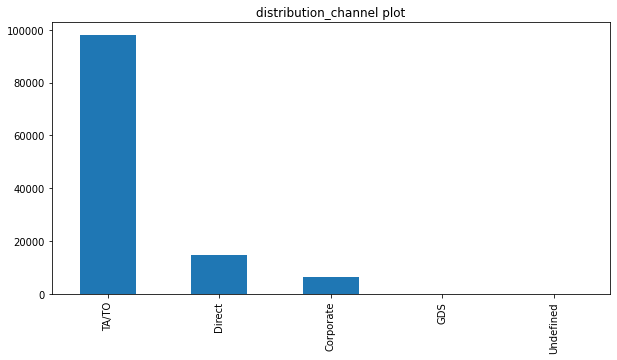

In [275]:
hotel_df['distribution_channel'].value_counts().plot(kind='bar',title='distribution_channel plot')

In [280]:
hotel_df['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

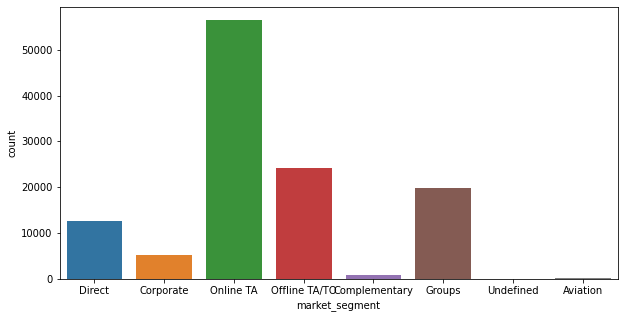

In [281]:
sns.countplot(data = hotel_df, x = 'market_segment')

In [286]:
hotel_df[['hotel','distribution_channel']].groupby(['hotel','distribution_channel']).aggregate({'hotel':'count'})

hotel
hotel        distribution_channel       
City Hotel   Corporate              3408
             Direct                 6780
             GDS                     193
             TA/TO                 68945
             Undefined                 4
Resort Hotel Corporate              3269
             Direct                 7865
             TA/TO                 28925
             Undefined                 1

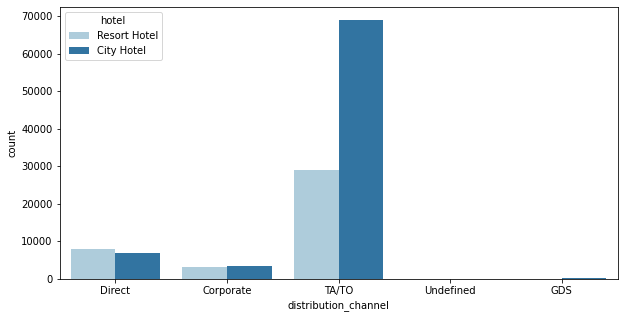

In [288]:
sns.countplot(x='distribution_channel',data=hotel_df,hue='hotel',palette='Paired')

In [290]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')